<a href="https://colab.research.google.com/github/chacha86/pythonai/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 머신러닝 > 기계학습 > 데이터의 패턴을 바탕으로 새로운 데이터 추측
# 지도학습 -> 답을 알려주는 것
# 비지도학습 -> 답을 알려주지 않는 것


In [ ]:
# 지도학습 
## 학생이 공부하는 것과 비슷
## 학습 데이터 -> 교과서, 문제집
## 학습 타겟 데이터 -> 문제 답
## 테스트 데이터 -> 모의 고사
## 테스트 타겟 데이터 -> 문제 답

## 예측 데이터 -> 수능(본고사)

## 모의고사 점수를 높이는 것 -> 모델 튜닝
## 모의고사 점수 -> 모델 평가



In [ ]:
# 머신러닝 프로세스

In [ ]:
## 1. 데이터 준비
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/Fish.csv')
df

In [ ]:
df.info()

In [ ]:
## 2. 탐색적 분석
# df.info()
# df.describe()

df.head()
df.tail()


fig , ax = plt.subplots(ncols=3, figsize=(15, 5))

# 어종 분포 
sns.countplot(data=df, x='Species', ax=ax[0])

# 어종의 평균 길이
sns.barplot(data=df, x='Species', y='Length1', errorbar=None, ax=ax[1])

# 어종의 평균 무게
sns.barplot(data=df, x='Species', y='Weight', errorbar=None, ax=ax[2])
# 어종의 평균 너비
# 어종의 평균 높이



In [ ]:
## 3. 상관관계 분석
## pairplot
sns.pairplot(df[['Length1', 'Weight', 'Height', 'Width']])

## 어종은 -> bream, smelt,
## 특성 -> Length1, Weight


In [ ]:
## 4. 결측치, 이상치, 불필요한 데이터 등등 -> 데이터 전처리
df2 = df[['Species', 'Length1', 'Weight']]
df3 = df2[(df2['Species'] == 'Bream') | (df2['Species'] == 'Smelt')]

In [ ]:
df3
## 5. 특성 처리 -> 추후에


In [ ]:
## 6. 학습
## 최근접 이웃 알고리즘
## sklearn

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

## fit(문제집, 답안지)
## transform()
## score()
## predict()

trd = df3[['Length1', 'Weight']] # 문제집
trt = df3['Species'] # 답안지

kn.fit(trd, trt)


In [ ]:
## 7. 예측 및 평가
kn.score(trd, trt) # 0 ~ 1점
kn.predict(trd.iloc[[0], :])



In [ ]:
df3

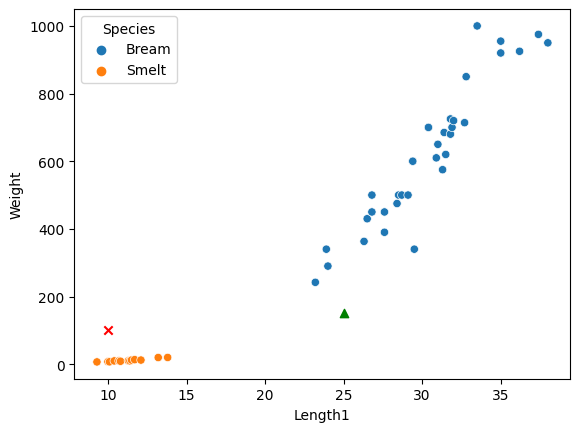

In [ ]:
## 최근접 이웃 알고리즘 -> 
## 예측 대상의 이웃을 k개를 뽑아서 이웃들 중 가장 많은 것을 정답으로 예측한다.

## 어종 분포 시각화
sns.scatterplot(data=df3, x='Length1', y='Weight', hue='Species')

## 점 찍기
plt.scatter(x=10, y=100, color='red', marker='x')
plt.scatter(x=25, y=150, color='green', marker='^')



In [ ]:
trd.shape

In [ ]:
## kn의 이웃수 바꿔보기
kn2 = KNeighborsClassifier()
kn2.n_neighbors = 49

## 학습
kn2.fit(trd, trt)
kn2.predict([[1,1]])

df3.shape
df3['Species'].value_counts()


In [ ]:
kn2.n_neighbors = 5
kn2.fit(trd, trt)
kn2.predict([[25,150]]) # Bream

In [ ]:
# 8. 학습데이터와 테스트데이터 분리
## 문제점 -> 아무리 봐도 bream인데 smelt라고 한다.
## 데이터 분리 -> 가지고 있는 전체 데이터(얼만큼은 공부용, 얼만큼은 시험용)
## 7 : 3, 7.5 : 2.5, 8 : 2

## trd(문제지), trt(정답지)
## 7:3 비율로 공부용/ 시험용으로 나누기.

t_idx = int(df3.shape[0] * 0.7) # 34

trd = df3.iloc[:t_idx, ] # 학습용
tsd = df3.iloc[t_idx : , ] # 시험용

## 데이터가 편향되어 있음
df3['Species'].value_counts()

print(35 / 49, 14 / 49)

## 판다스 데이터프레임 섞기
df4 = df3.sample(frac=1, random_state=42).reset_index(drop=True)

trd2 = df4.iloc[:t_idx, ]
tsd2 = df4.iloc[t_idx:, ]

trd2['Species'].value_counts()
print(26 / 34, 8 / 34)

trt2 = trd2['Species'] # 학습용 정답
tst2 = tsd2['Species'] # 시험용 정답
trd2 = trd2[['Length1', 'Weight']] # 학습용 문제
tsd2 = tsd2[['Length1', 'Weight']] # 시험용 문제

## 학습
kn2.fit(trd2, trt2)
kn2.score(tsd2, tst2) # 100% 평가


kn2.predict([[25, 150]])
## 학습데이터와 시험용 데이터로 공부는 잘 시켰음에도 불구하고, 문제가 있다.


In [ ]:
## 9. 튜닝
## 데이터 튜닝 - 표준화

## 너가 뽑은 이웃 5개의 정보를 보여줘
k_dist, k_idx = kn2.kneighbors([[25, 150]])

k_idx # numpy의 ndarray
k_idx_1d = k_idx.reshape(5) # numpy 배열의 모양 바꾸기

neighbors_fish = trd2.iloc[k_idx_1d, :]
#trt2[k_idx_1d]

neighbors_fish



In [ ]:
sns.scatterplot(data=df3, x='Length1', y='Weight', hue='Species')
plt.scatter(x=25, y=150, marker='x', color='red')
plt.scatter(x=neighbors_fish['Length1'], y=neighbors_fish['Weight'], color='purple')


## 두 축의 기준이 달라서 민감도가 다르다.
plt.xlim([0, 1000])

In [ ]:
## 표준화 -> 같은 기준에 놓고 보겠다.

mean = trd2.mean(axis=0)
std = trd2.std(axis=0)


scaled_trd = (trd2 - mean) / std


sns.scatterplot(data=scaled_trd, x='Length1', y='Weight')

#s1 = pd.Series([1,2,3,4])
target = pd.DataFrame([[25, 150]], columns=['Length1', 'Weight'])           
scaled_target = (target - mean) / std
plt.scatter(x=scaled_target['Length1'], y=scaled_target['Weight'], color='red', marker='x')



In [ ]:
## 10. 재학습 및 평가
kn2.fit(scaled_trd, trt2)



KNeighborsClassifier()

In [ ]:
kn2.predict(scaled_target)

array(['Bream'], dtype=object)